In [1]:
%pip install jupyterlab pandas yfinance matplotlib statsmodels numpy scipy pmdarima

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\Inteli\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm

In [3]:
# Buscando os dados da ação da Apple
dogecoin = yf.Ticker('DOGE-USD')
dogecoin_data = dogecoin.history(period='1y')
dogecoin_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-09-30 00:00:00+00:00,0.062180,0.062506,0.061799,0.062141,124411353,0.0,0.0
2023-10-01 00:00:00+00:00,0.062140,0.063519,0.061896,0.063193,162108911,0.0,0.0
2023-10-02 00:00:00+00:00,0.063190,0.063961,0.061626,0.062060,275648168,0.0,0.0
2023-10-03 00:00:00+00:00,0.062054,0.062269,0.061228,0.061386,156615776,0.0,0.0
2023-10-04 00:00:00+00:00,0.061389,0.061561,0.060458,0.061488,141610437,0.0,0.0


In [4]:
dogecoin_data.reset_index(inplace=True)

In [5]:
dogecoin_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [6]:
# Supondo que sua coluna se chama 'Date'
dogecoin_data['Date'] = pd.to_datetime(dogecoin_data['Date'])

In [7]:
dogecoin_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2023-09-30 00:00:00+00:00,0.062180,0.062506,0.061799,0.062141,124411353,0.0,0.0
1,2023-10-01 00:00:00+00:00,0.062140,0.063519,0.061896,0.063193,162108911,0.0,0.0
2,2023-10-02 00:00:00+00:00,0.063190,0.063961,0.061626,0.062060,275648168,0.0,0.0
3,2023-10-03 00:00:00+00:00,0.062054,0.062269,0.061228,0.061386,156615776,0.0,0.0
4,2023-10-04 00:00:00+00:00,0.061389,0.061561,0.060458,0.061488,141610437,0.0,0.0


In [8]:
print('Tipo dos dados:', type(dogecoin_data))
print('Dimensões dos dados:', dogecoin_data.shape)
print('Colunas dos dados:', dogecoin_data.columns)
print('Informações dos dados:', dogecoin_data.info())

Tipo dos dados: <class 'pandas.core.frame.DataFrame'>
Dimensões dos dados: (367, 8)
Colunas dos dados: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Date          367 non-null    datetime64[ns, UTC]
 1   Open          367 non-null    float64            
 2   High          367 non-null    float64            
 3   Low           367 non-null    float64            
 4   Close         367 non-null    float64            
 5   Volume        367 non-null    int64              
 6   Dividends     367 non-null    float64            
 7   Stock Splits  367 non-null    float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(1)
memory usage: 23.1 KB
Informações dos dados: None


In [9]:
print('Tipo do índice:', type(dogecoin_data.index))

Tipo do índice: <class 'pandas.core.indexes.range.RangeIndex'>


In [10]:
print('Valores do índice:', dogecoin_data.index)

Valores do índice: RangeIndex(start=0, stop=367, step=1)


<Axes: title={'center': 'Preço de Fechamento da Ação'}>

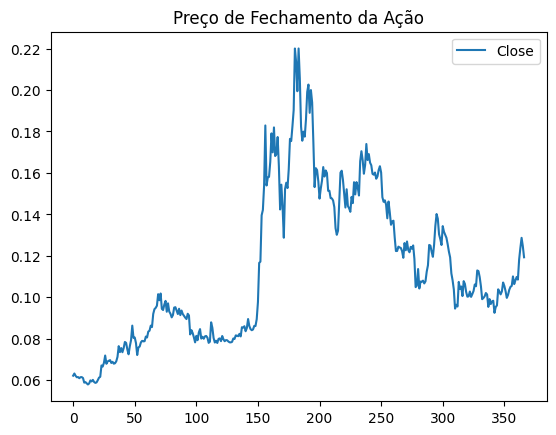

In [11]:
dogecoin_data.plot(y='Close', title='Preço de Fechamento da Ação')

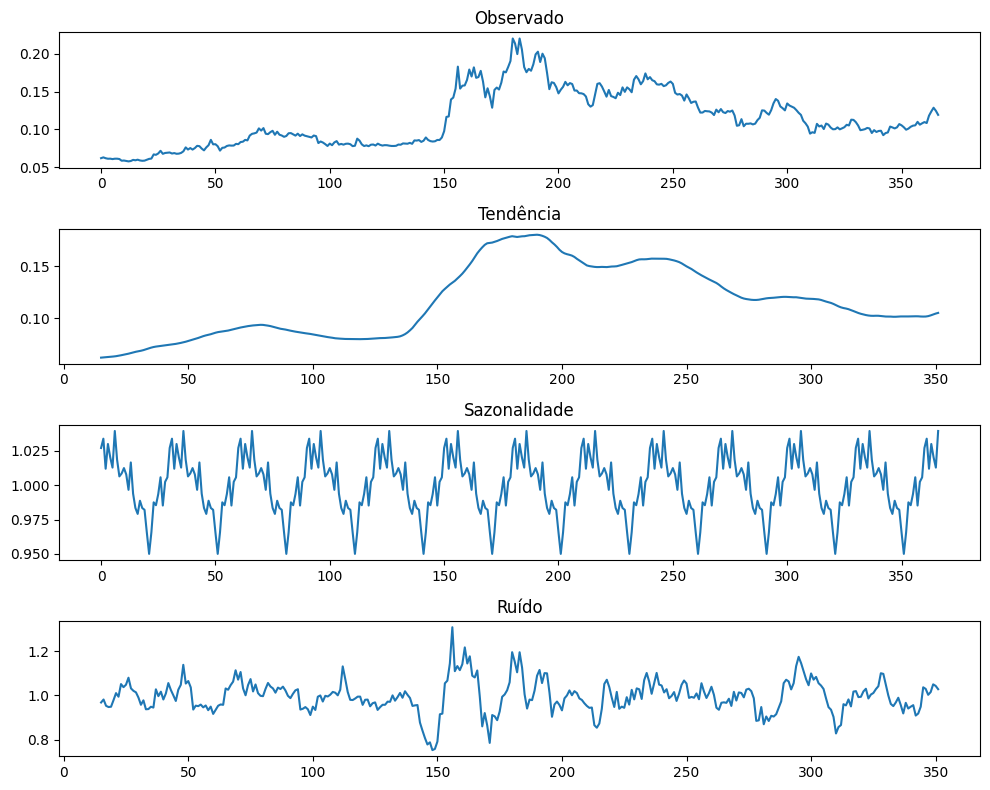

In [12]:
# Decompondo a série temporal
decomposition = seasonal_decompose(dogecoin_data['Close'], model='multiplicative', period=30)

# Plotando a decomposição
fig, axes = plt.subplots(4, 1, figsize=(10, 8))
decomposition.observed.plot(ax=axes[0], title='Observado')
decomposition.trend.plot(ax=axes[1], title='Tendência')
decomposition.seasonal.plot(ax=axes[2], title='Sazonalidade')
decomposition.resid.plot(ax=axes[3], title='Ruído')
plt.tight_layout()

In [13]:
# Teste de Dickey-Fuller
result = adfuller(dogecoin_data['Close'])
print('Estatística do teste:', result[0])
print('Valor-p:', result[1])
print('Valores críticos:', result[4])

Estatística do teste: -1.9578409976947904
Valor-p: 0.3053586032334592
Valores críticos: {'1%': -3.4489583388155194, '5%': -2.869739378430086, '10%': -2.5711381780459}


Dado que os resultados indicam que a série é não estacionaria, será necessario transformar a serie em uma série estacionaria para realizar a modelagem do usando ARIMA

<Axes: title={'center': 'Diferença dos Dados'}>

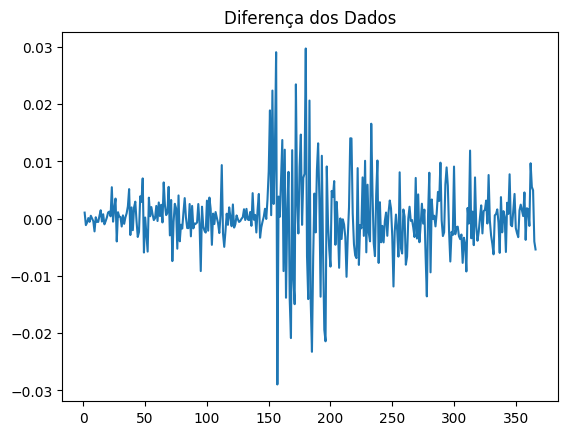

In [14]:
# Diferenciando os dados
dogecoin_data['Close_diff'] = dogecoin_data['Close'].diff()
dogecoin_data['Close_diff'].plot(title='Diferença dos Dados')

In [15]:
# Teste de Dickey-Fuller
result = adfuller(dogecoin_data['Close_diff'].dropna())
print('Estatística do teste:', result[0])
print('Valor-p:', result[1])
print('Valores críticos:', result[4])

Estatística do teste: -5.543050278057954
Valor-p: 1.6846919589065518e-06
Valores críticos: {'1%': -3.4489583388155194, '5%': -2.869739378430086, '10%': -2.5711381780459}


In [16]:
data = dogecoin_data['Close']

Normalização dos dados

In [17]:
import math
import numpy as np

df_max_scaled = dogecoin_data.copy() 
  
# apply normalization techniques 
for column in df_max_scaled.columns:
    if column != "Date":
        df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max() 
      
# view normalized data 
display(df_max_scaled)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close_diff
0,2023-09-30 00:00:00+00:00,0.282553,0.275866,0.295958,0.282377,0.013280,NaN,NaN,NaN
1,2023-10-01 00:00:00+00:00,0.282371,0.280337,0.296423,0.287157,0.017304,NaN,NaN,0.035390
2,2023-10-02 00:00:00+00:00,0.287142,0.282288,0.295130,0.282009,0.029424,NaN,NaN,-0.038115
3,2023-10-03 00:00:00+00:00,0.281980,0.274820,0.293224,0.278946,0.016718,NaN,NaN,-0.022674
4,2023-10-04 00:00:00+00:00,0.278958,0.271695,0.289536,0.279410,0.015116,NaN,NaN,0.003431
...,...,...,...,...,...,...,...,...,...
362,2024-09-26 00:00:00+00:00,0.493054,0.530331,0.513122,0.537007,0.143856,NaN,NaN,0.325372
363,2024-09-27 00:00:00+00:00,0.537005,0.565272,0.561146,0.562173,0.146011,NaN,NaN,0.186302
364,2024-09-28 00:00:00+00:00,0.562170,0.582352,0.577635,0.584698,0.154753,NaN,NaN,0.166757
365,2024-09-29 00:00:00+00:00,0.584691,0.575079,0.596916,0.566535,0.091473,NaN,NaN,-0.134462


In [18]:
# Remover a primeira linha do dataset
dogecoin_data = dogecoin_data.drop(dogecoin_data.index[0])

dogecoin_data = dogecoin_data.drop(columns=['Dividends', 'Stock Splits'])

dogecoin_data.head()

,Date,Open,High,Low,Close,Volume,Close_diff
1,2023-10-01 00:00:00+00:00,0.062140,0.063519,0.061896,0.063193,162108911,0.001052
2,2023-10-02 00:00:00+00:00,0.063190,0.063961,0.061626,0.062060,275648168,-0.001133
3,2023-10-03 00:00:00+00:00,0.062054,0.062269,0.061228,0.061386,156615776,-0.000674
4,2023-10-04 00:00:00+00:00,0.061389,0.061561,0.060458,0.061488,141610437,0.000102
5,2023-10-05 00:00:00+00:00,0.061486,0.061607,0.060839,0.060923,114148166,-0.000565


In [26]:
# Baixar os dados das ações da DOGE
dogecoin = yf.download('DOGE-USD', period='1y')
dogecoin

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-30,0.062180,0.062506,0.061799,0.062141,0.062141,124411353
2023-10-01,0.062140,0.063519,0.061896,0.063193,0.063193,162108911
2023-10-02,0.063190,0.063961,0.061626,0.062060,0.062060,275648168
2023-10-03,0.062054,0.062269,0.061228,0.061386,0.061386,156615776
2023-10-04,0.061389,0.061561,0.060458,0.061488,0.061488,141610437
...,...,...,...,...,...,...
2024-09-26,0.108504,0.120163,0.107145,0.118176,0.118176,1347684388
2024-09-27,0.118176,0.128080,0.117173,0.123714,0.123714,1367867354
2024-09-28,0.123714,0.131950,0.120616,0.128671,0.128671,1449764972


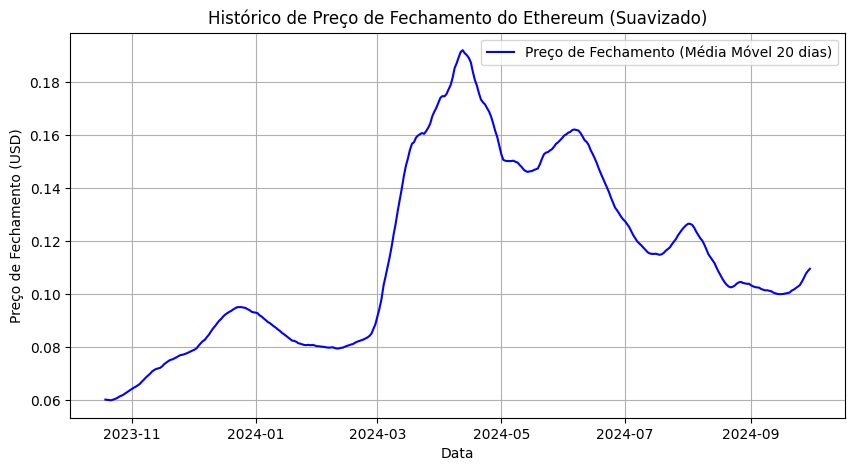

In [27]:
# Aplicando uma média móvel de 20 dias para suavizar o gráfico de fechamento
dogecoin['Close_Smooth'] = dogecoin['Close'].rolling(window=20).mean()

# Plotando os dados de fechamento suavizados
plt.figure(figsize=(10, 5))
plt.plot(dogecoin['Close_Smooth'], label='Preço de Fechamento (Média Móvel 20 dias)', color='blue')
plt.title('Histórico de Preço de Fechamento do Ethereum (Suavizado)')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (USD)')
plt.grid(True)
plt.legend()
plt.show()

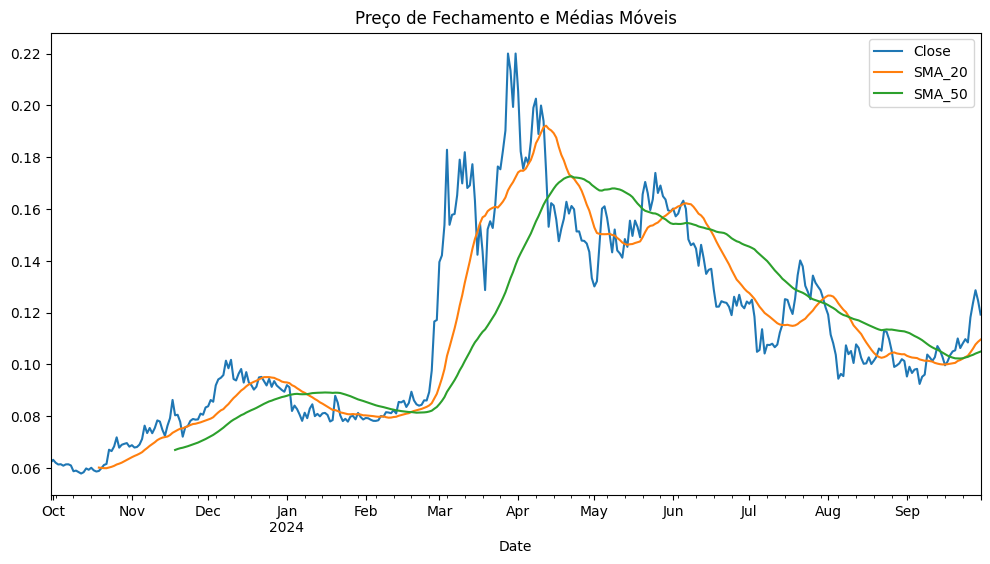

In [28]:
# Calculando médias móveis simples (SMA) de 20 e 50 dias
dogecoin['SMA_20'] = dogecoin['Close'].rolling(window=20).mean()
dogecoin['SMA_50'] = dogecoin['Close'].rolling(window=50).mean()

# Visualizando as médias móveis junto com o preço de fechamento sem suavizar
dogecoin[['Close', 'SMA_20', 'SMA_50']].plot(figsize=(12, 6))
plt.title('Preço de Fechamento e Médias Móveis')
plt.show()